<a href="https://colab.research.google.com/github/teaser303/ARENA/blob/main/Office_hours_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

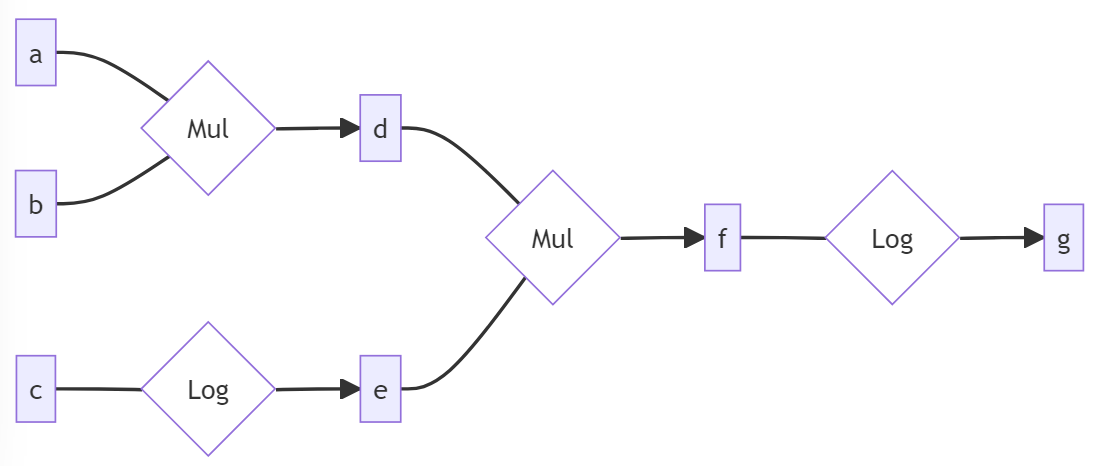


# Task: Manual Forward and Backward Propagation

**Objective:** To understand the mechanics of backpropagation, you will manually compute the forward pass values and backward pass gradients for the given computational graph.


**Initial Values:**
* `a = 1`
* `b = 2`
* `c = 3`

---

**Task 1: Manual Calculation (No Autograd!)**

1.  **Forward Pass:** Calculate the numerical value of nodes `d`, `e`, `f`, and `g` step-by-step using the initial values.
2.  **Backward Pass:** Calculate the numerical value of the gradient of the final output `g` with respect to *each* node:
    * `∂g/∂g`
    * `∂g/∂f`
    * `∂g/∂e`
    * `∂g/∂d`
    * `∂g/∂c`
    * `∂g/∂b`
    * `∂g/∂a`

    Apply the chain rule systematically. You should work backward from `∂g/∂g = 1`. Recall basic derivatives: `d(x*y)/dx = y`, `d(ln(x))/dx = 1/x`. Show your derivation steps (e.g., on paper).

**IMPORTANT CONSTRAINT:**
You **must perform these calculations without autograd or `.backward`**. The provided Python code cells are **only for checking** your final numerical answers after you have derived them manually.

---

**Checking Your Work:**

1.  First, run the **(Setup Cell)** below. This cell computes the correct answers internally (without showing them) and prepares the checking function.
2.  Then, enter your manually calculated *numerical* results into the variables provided in Cell below the setup cell.
3.  Finally, run the Cell to see if your answers are correct. The output will indicate "Correct!" or "Incorrect." for each value/gradient.

Good luck!

In [ ]:
# @title
# SETUP / ANSWERS Cell
import torch
import math

print("--- Setting up calculation engine and checker ---")

# --- Compute Correct Answers (Internal) ---
try:
    # Define tensors
    a = torch.tensor(1.0, requires_grad=True)
    b = torch.tensor(2.0, requires_grad=True)
    c = torch.tensor(3.0, requires_grad=True)

    # Forward pass
    d = a * b
    e = torch.log(c)
    f = d * e
    g = torch.log(f)

    # Retain intermediate grads
    d.retain_grad()
    e.retain_grad()
    f.retain_grad()

    # Backward pass
    g.backward()

    # Store correct answers internally
    _correct_answers = {
        "d": d.item(), "e": e.item(), "f": f.item(), "g": g.item(),
        "dg_da": a.grad.item(), "dg_db": b.grad.item(), "dg_dc": c.grad.item(),
        "dg_dd": d.grad.item(), "dg_de": e.grad.item(), "dg_df": f.grad.item(),
        "dg_dg": 1.0
    }
    _setup_complete = True
    # Optional: uncomment below to see answers when running setup
    # print("DEBUG: Correct answers computed:", _correct_answers)

except Exception as e:
    print(f"Error during setup: {e}")
    _setup_complete = False

# --- Define Checking Function (Internal) ---
_tolerance = 1e-4 # Tolerance for floating point comparison

def _check_exercise_answers(student_answers):
    """
    Checks student's answers against internally stored correct answers.
    Prints feedback without revealing the correct value in case of error.
    Uses assert-like behaviour: stops on first error if using assertions,
    or prints all feedback if using print statements. We'll use print.
    """
    if not _setup_complete:
        print("ERROR: Setup cell did not complete successfully. Cannot check answers.")
        return

    print("\n--- Checking Your Answers ---")
    all_correct_flag = True

    expected_keys = _correct_answers.keys()
    provided_keys = student_answers.keys()

    if set(expected_keys) != set(provided_keys):
         print(f"ERROR: Mismatched keys. Expected: {expected_keys}, Provided: {provided_keys}")
         all_correct_flag = False
         return # Stop checking if keys don't match

    for key, student_val in student_answers.items():
        correct_val = _correct_answers[key]
        try:
            # Attempt conversion to float in case student entered integer
            student_val_float = float(student_val)
            if abs(student_val_float - correct_val) < _tolerance:
                print(f"  {key}: Correct!")
            else:
                print(f"  {key}: Incorrect.")
                all_correct_flag = False
        except (ValueError, TypeError):
             print(f"  {key}: Invalid input value ({student_val}). Please enter a number.")
             all_correct_flag = False


    print("\n--- Check Complete ---")
    if all_correct_flag:
        print("Result: All answers are correct!")
    else:
        print("Result: Some answers are incorrect or invalid. Please review.")


print("--- Setup complete. You can now enter answers in Cell 1 and run it. ---")

--- Setting up calculation engine and checker ---
--- Setup complete. You can now enter answers in Cell 1 and run it. ---


In [ ]:
a = 1.0
b = 2.0
c = 3.0

# Forward Pass Values:
my_d = 0 # Replace with your value for d
my_e = 0 # Replace with your value for e = ln(3)
my_f = 0 # Replace with your value for f = d * e
my_g = 0 # Replace with your value for g = ln(f)

# Backward Pass Gradients (∂g/∂variable):
my_dg_da = 0   # Replace with your value for ∂g/∂a
my_dg_db = 0   # Replace with your value for ∂g/∂b
my_dg_dc = 0   # Replace with your value for ∂g/∂c
my_dg_dd = 0   # Replace with your value for ∂g/∂d
my_dg_de = 0   # Replace with your value for ∂g/∂e
my_dg_df = 0   # Replace with your value for ∂g/∂f
my_dg_dg = 0   # Replace with your value for ∂g/∂g (should be 1.0)


# --- Package your answers ---
# (No need to edit below this line in this cell)
_student_answers_pkg = {
    "d": my_d, "e": my_e, "f": my_f, "g": my_g,
    "dg_da": my_dg_da, "dg_db": my_dg_db, "dg_dc": my_dg_dc,
    "dg_dd": my_dg_dd, "dg_de": my_dg_de, "dg_df": my_dg_df, "dg_dg": my_dg_dg
}

# --- Run the Check ---
# This calls the function defined in Cell 2 (Setup Cell)
try:
    # Check if the checker function exists (i.e., if Cell 2 was run)
    if '_check_exercise_answers' in globals():
         _check_exercise_answers(_student_answers_pkg)
    else:
        print("ERROR: Please run the Setup Cell (Cell 2) before running this cell!")
except Exception as e:
    print(f"An error occurred during checking: {e}")


--- Checking Your Answers ---
  d: Incorrect.
  e: Incorrect.
  f: Incorrect.
  g: Incorrect.
  dg_da: Incorrect.
  dg_db: Incorrect.
  dg_dc: Incorrect.
  dg_dd: Incorrect.
  dg_de: Incorrect.
  dg_df: Incorrect.
  dg_dg: Incorrect.

--- Check Complete ---
Result: Some answers are incorrect or invalid. Please review.


# Bonus Task

**Task Instructions**

Manually perform one step of gradient descent training for the computational graph defined by operations `d=a*b`, `e=ln(c)`, `f=w1*d+w2*e+b1`, `g=ln(f)`, aiming to match a `target_value (g)=1.0` using a squared error Loss `L=(g - target_value)^2`. Use initial inputs `a=1, b=2, c=3`, initial parameters `w1=0.5, w2=-0.5, b1=0.1`, and a learning rate `lr=0.1`. First, calculate the forward pass values `d, e, f, g`, and the initial `Loss`. Second, use the chain rule (working backward from `L`) to find the gradients of the Loss with respect to the parameters: `∂L/∂w1`, `∂L/∂w2`, `∂L/∂b1`. Third, calculate the updated parameters `w1_new, w2_new, b1_new` using the rule `param_new = param_old - lr * ∂L/∂param`.

---

**Question:**

Conceptually, explain how the backpropagation process affects the weights (`w1`, `w2`) and bias (`b1`) in this graph. What is the purpose of calculating their gradients (`∂L/∂w1`, `∂L/∂w2`, `∂L/∂b1`) and performing the weight update step in the context of minimizing the Loss? *(Answer in a text cell below your checking code cells).*

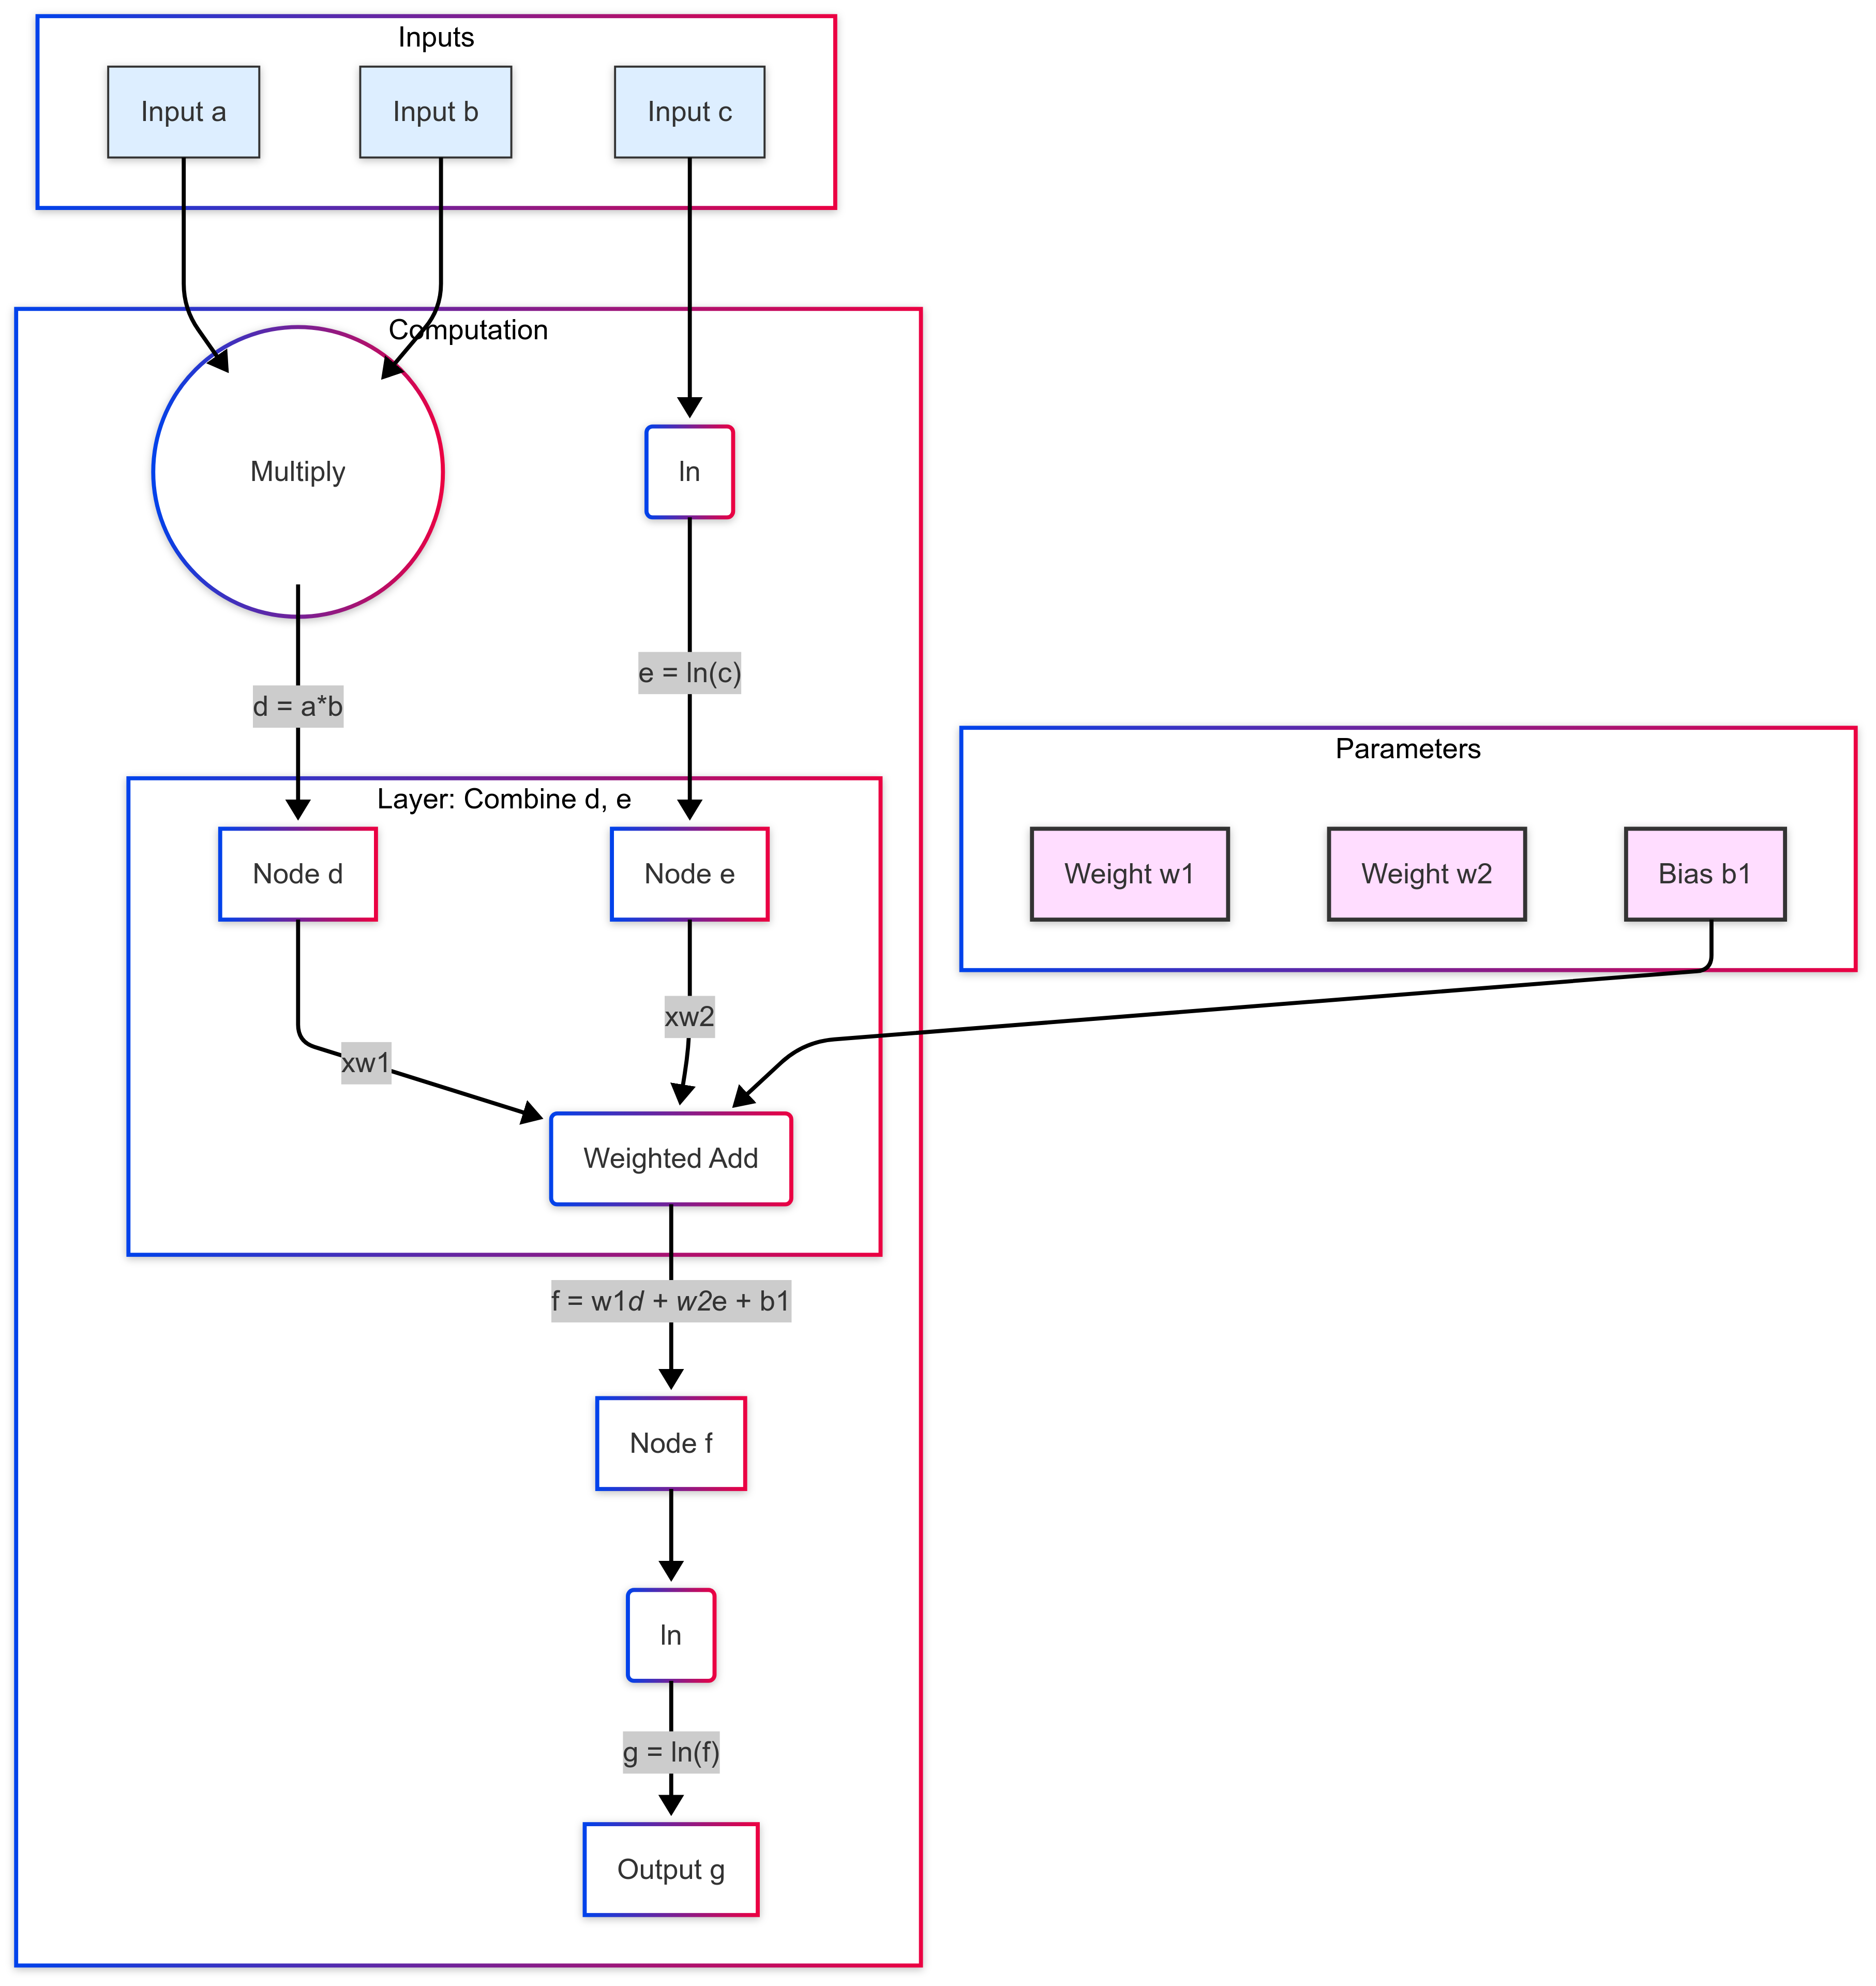